### Learning how to use python and sympy to solve transforms and find series (laplace transforms, fourier transforms, and fourier series)

##### 1. Piecewise functions
A piecewise function is a function defined by multiple sub-functions, each applying to a specified interval of the input (domain). It's essentially a function that behaves differently based on the input value, with different formulas or rules for different parts of the input range.

For example: 
$$
f(x) = 
\begin{cases}
x^2 & \text{if } x < 0 \\
x+1 & \text{if } 0 \le x < 2 \\
3   & \text{if } x \ge 2
\end{cases}
$$

In [4]:
from sympy import Piecewise
from sympy.abc import x
from sympy.plotting import plot
from sympy import diff, integrate


# 1. Defining our piecewise function
f = Piecewise (
    (x**2,   x < 0),
    (x + 1, (x>=0) & (x < 2)),
    (3,      x >= 2)
)


# 2. getting values
print(f.subs(x, -3))
print(f.subs(x,  1))
print(f.subs(x,  5))


# 3. plotting
p = plot(f, (x, -3, 3), show=False)


# 4. Differentiate and integrate
df  = diff(f, x)
ddf = integrate(f, x)


# 5. We can also use them like regular functions
g = f**2 + 2*f + 1

# p.show()

9
2
3


In [2]:
### The plot above look horrible :(, lets fix that
p.title         = "Improved Piecewise Plot"
p.xlabel        = 'x'
p.ylabel        = 'f(x)'
p.legend        = True
p[0].line_color = 'red'
p[0].label      = 'f(x)'
p.show()


NameError: name 'p' is not defined

##### 2. Better piecewise function plotting
We can use matplotlib for more control

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import lambdify


# Use LaTeX rendering for all lables
plt.rcParams["text.usetex"] = False

# convert to a numpy-useable function
f_np = lambdify(x, f, 'numpy')

# generate values
x_vals = np.linspace(-3, 3, 1000)
y_vals = f_np(x_vals)

# plot with matplot lib
plt.figure(figsize=(8,4))
# plt.plot(x_vals, y_vals, color='darkorange', linewidth=2, label=r"$f(x)$")
plt.plot(x_vals, y_vals, color='darkorange', linewidth=2, label="f(x)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.axhline(0, color='gray', lw=1)
plt.axvline(0, color='gray', lw=1)
plt.title("Better Piecewise function", fontsize=14)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.tight_layout()
plt.show()

NameError: name 'x' is not defined

##### 3. Fourier Series
Basically allows us represent any periodic function that obeys the **Dirchlet conditions** as an infinite sum of sine and consine terms, super cool if you ask me. For a periodic function $f(x)$ with period $2L$, its Fourier series is:

$$f(x) = \frac{a_0}{2} + \sum_{n = 1}^{\infty}\left[a_n\cos nx+ b_n \sin nx \right]$$

where:
- $a_0 = \frac{1}{2\pi}\int_{-\pi}^{\pi}f(x)dx$
- $a_n = \frac{1}{\pi} \int_{-\pi}^{\pi}f(x) \cos nx dx$
- $b_n = \frac{1}{\pi} \int_{-\pi}^{\pi}f(x) \sin nx dx$

*REMARK*: The dirchlet conditions are sufficient for the Fourier series to represent $f(x)$ not only at a point of continuity, but with a slight modification, also at a point of discontinuity, its also important to note, that while being sufficient, the dirchlet conditions are not necessary because there are functions that not satisfy these condtions but still posses a convergent Fourier series. However, the cases meet in Science and Engineering do generally meet these conditions

Our example will be the piecewise function: 
$$
f(x) = 
\begin{cases}
1 & \text{if } \pi < x < 0 \\
-1 & \text{if } 0 < x < \pi
\end{cases}
$$

In [5]:
from sympy import symbols, integrate, cos, sin, pi, simplify, fourier_series, Piecewise
from sympy.abc import x, n

# Sympy does not automatically extend piecewise functions periodically, we have two ways
# to fix this:
# OPTION 1: Use fmod to make it periodic
f = Piecewise(
    (1, (x > -pi) & (x < 0)),
    (-1, (x > 0) & (x < pi)),
    (0, True)
)

# f_periodic = Piecewise(
#     (1,  (fmod(x + pi, 2*pi) < pi)),
#     (-1, (fmod(x + pi, 2*pi) >= pi))
# )

# We generate the fourier series with
F = fourier_series(f, (x, -pi, pi))
# We can truncate to just 5 terms
F5 = F.truncate(n=1000)
F5

-4*sin(x)/pi - 4*sin(3*x)/(3*pi) - 4*sin(5*x)/(5*pi) - 4*sin(7*x)/(7*pi) - 4*sin(9*x)/(9*pi) - 4*sin(11*x)/(11*pi) - 4*sin(13*x)/(13*pi) - 4*sin(15*x)/(15*pi) - 4*sin(17*x)/(17*pi) - 4*sin(19*x)/(19*pi) - 4*sin(21*x)/(21*pi) - 4*sin(23*x)/(23*pi) - 4*sin(25*x)/(25*pi) - 4*sin(27*x)/(27*pi) - 4*sin(29*x)/(29*pi) - 4*sin(31*x)/(31*pi) - 4*sin(33*x)/(33*pi) - 4*sin(35*x)/(35*pi) - 4*sin(37*x)/(37*pi) - 4*sin(39*x)/(39*pi) - 4*sin(41*x)/(41*pi) - 4*sin(43*x)/(43*pi) - 4*sin(45*x)/(45*pi) - 4*sin(47*x)/(47*pi) - 4*sin(49*x)/(49*pi) - 4*sin(51*x)/(51*pi) - 4*sin(53*x)/(53*pi) - 4*sin(55*x)/(55*pi) - 4*sin(57*x)/(57*pi) - 4*sin(59*x)/(59*pi) - 4*sin(61*x)/(61*pi) - 4*sin(63*x)/(63*pi) - 4*sin(65*x)/(65*pi) - 4*sin(67*x)/(67*pi) - 4*sin(69*x)/(69*pi) - 4*sin(71*x)/(71*pi) - 4*sin(73*x)/(73*pi) - 4*sin(75*x)/(75*pi) - 4*sin(77*x)/(77*pi) - 4*sin(79*x)/(79*pi) - 4*sin(81*x)/(81*pi) - 4*sin(83*x)/(83*pi) - 4*sin(85*x)/(85*pi) - 4*sin(87*x)/(87*pi) - 4*sin(89*x)/(89*pi) - 4*sin(91*x)/(91*pi) - 4*s

We can also plot it to visualise this series representation

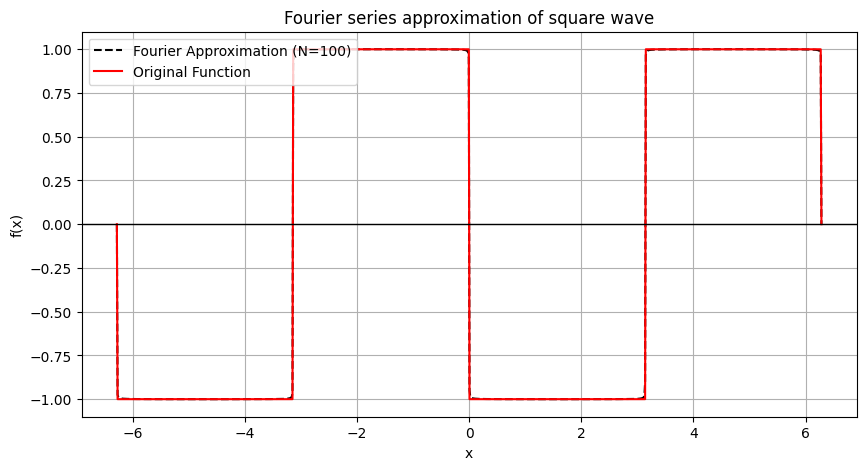

In [6]:
f_lamb  = lambdify(x, F5, 'numpy')
f_np    = lambdify(x, f, 'numpy')

## OPTION 2: We can just wrap x_vals before evaluation:
x_vals  = np.linspace(-2*np.pi, 2*np.pi, 1000)
## we can generalise this for any period
"""
x_mod = np.mod(x_vals + period/2, period) - period/2
"""
x_mod   = np.mod(x_vals + np.pi, 2*np.pi) - np.pi
y_np    = f_np(x_mod)
y_vals  = f_lamb(x_vals)

plt.figure(figsize=(10, 5))
plt.plot(x_vals, y_vals, label="Fourier Approximation (N=100)", color="black", linestyle="--")
plt.plot(x_vals, y_np, label="Original Function", color="red")

plt.title("Fourier series approximation of square wave")
plt.grid(True)
plt.legend(loc='upper left')
plt.axhline(0, color='black', lw=1)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.savefig("fourier_series_approximation, dpi=300, bbox_inches='tight")
plt.show()

Or we can take the alternative route to finding the Fourier series of our periodic function, we can find the coefficients manually and then create the sequence our self.